Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-1892096979.py:76: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-1892096979.py:76: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-1892096979.py:76: UserWarning: Glyph 22870 (\N{CJK UNIFIED IDEOGRAPH-5956}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-1892096979.py:76: UserWarning: Glyph 29260 (\N{CJK UNIFIED IDEOGRAPH-724C}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-1892096979.py:76: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-1892096979.py:76: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-1892096979.py:76: UserWarning: Glyph 22885 (\N{CJK UNIFIE

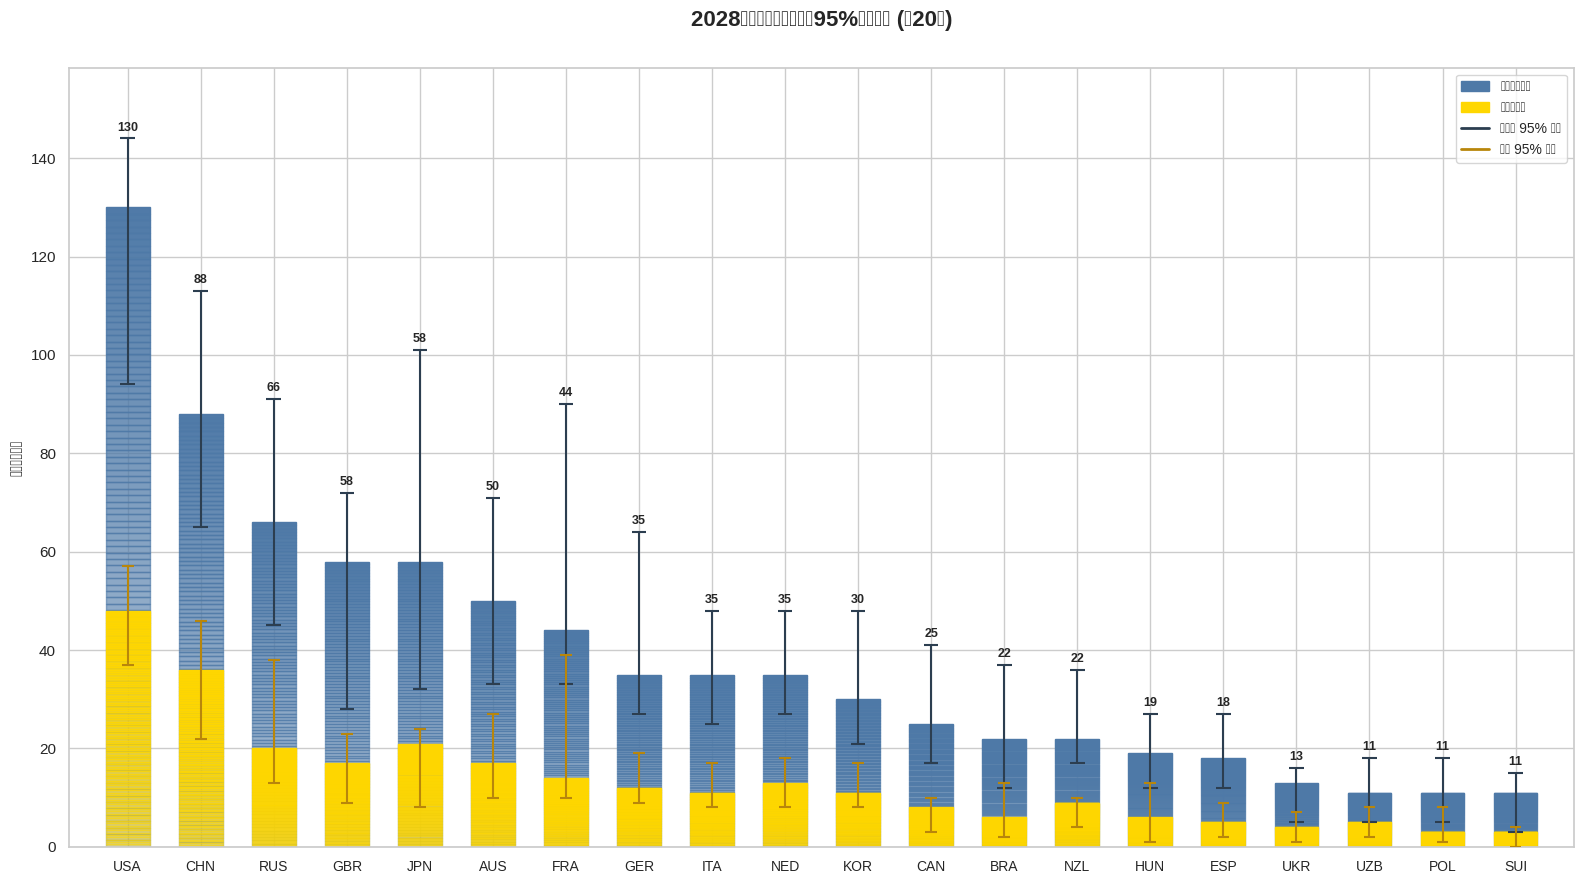

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from google.colab import drive

# 1. 挂载 Google Drive
drive.mount('/content/drive')

# 2. 读取并处理数据
file_path = '/content/drive/MyDrive/medal_predictions_2028_with_host.csv'
df = pd.read_csv(file_path)

# 过滤掉总奖牌预测为 0 的国家，并取前 20 名（扩大一点范围）
df_plot = df[df['Predicted_Total'] > 0].sort_values('Predicted_Total', ascending=False).head(20).reset_index()

# 3. 创建画布
fig, ax = plt.subplots(figsize=(16, 9), dpi=100)

def draw_gradient_bar(ax, x, y, width, bottom=0, color_start='#4E79A7'):
    """绘制垂直渐变柱子"""
    grad_levels = 100
    for i in range(grad_levels):
        color = plt.cm.colors.to_rgba(color_start, alpha=1.0)
        alpha = 0.4 + 0.6 * (i / grad_levels)
        section_height = y / grad_levels
        rect = patches.Rectangle((x - width/2, bottom + i * section_height),
                                 width, section_height,
                                 color=color, alpha=alpha, zorder=2)
        ax.add_patch(rect)

# 4. 绘图循环
bar_width = 0.6

for i, row in df_plot.iterrows():
    # --- A. 绘制总奖牌 (底层深蓝渐变) ---
    draw_gradient_bar(ax, i, row['Predicted_Total'], bar_width, color_start='#4E79A7')

    # --- B. 绘制总奖牌置信区间 (Error Bar) ---
    ax.vlines(i, row['Predicted_Total_Lower95'], row['Predicted_Total_Upper95'],
              colors='#2C3E50', linewidth=1.5, zorder=3)
    # 画区间的横短线 (Caps)
    ax.hlines([row['Predicted_Total_Lower95'], row['Predicted_Total_Upper95']],
              i-0.1, i+0.1, colors='#2C3E50', linewidth=1.5, zorder=3)

    # --- C. 绘制金牌 (叠加金色渐变) ---
    draw_gradient_bar(ax, i, row['Predicted_Gold'], bar_width, color_start='#FFD700')

    # --- D. 绘制金牌置信区间 (Error Bar) ---
    ax.vlines(i, row['Predicted_Gold_Lower95'], row['Predicted_Gold_Upper95'],
              colors='#B8860B', linewidth=1.5, zorder=4)
    ax.hlines([row['Predicted_Gold_Lower95'], row['Predicted_Gold_Upper95']],
              i-0.08, i+0.08, colors='#B8860B', linewidth=1.5, zorder=4)

    # --- E. 数值标注 ---
    ax.text(i, row['Predicted_Total_Upper95'] + 1, f"{int(row['Predicted_Total'])}",
            ha='center', va='bottom', fontsize=9, fontweight='bold')

# 5. 图表修饰
ax.set_xlim(-0.8, len(df_plot) - 0.2)
ax.set_ylim(0, df_plot['Predicted_Total_Upper95'].max() * 1.1)
ax.set_xticks(range(len(df_plot)))
ax.set_xticklabels(df_plot['Mapped_NOC'], fontsize=10, rotation=0)

plt.title('2028奥运奖牌预测：包含95%置信区间 (前20名)', fontsize=16, pad=30, fontweight='bold')
plt.ylabel('预测奖牌数量', fontsize=12)

# 手动创建复杂的图例
legend_elements = [
    patches.Patch(color='#4E79A7', label='总奖牌预测点'),
    patches.Patch(color='#FFD700', label='金牌预测点'),
    plt.Line2D([0], [0], color='#2C3E50', lw=2, label='总奖牌 95% 区间'),
    plt.Line2D([0], [0], color='#B8860B', lw=2, label='金牌 95% 区间')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, fontsize=10)

plt.tight_layout()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


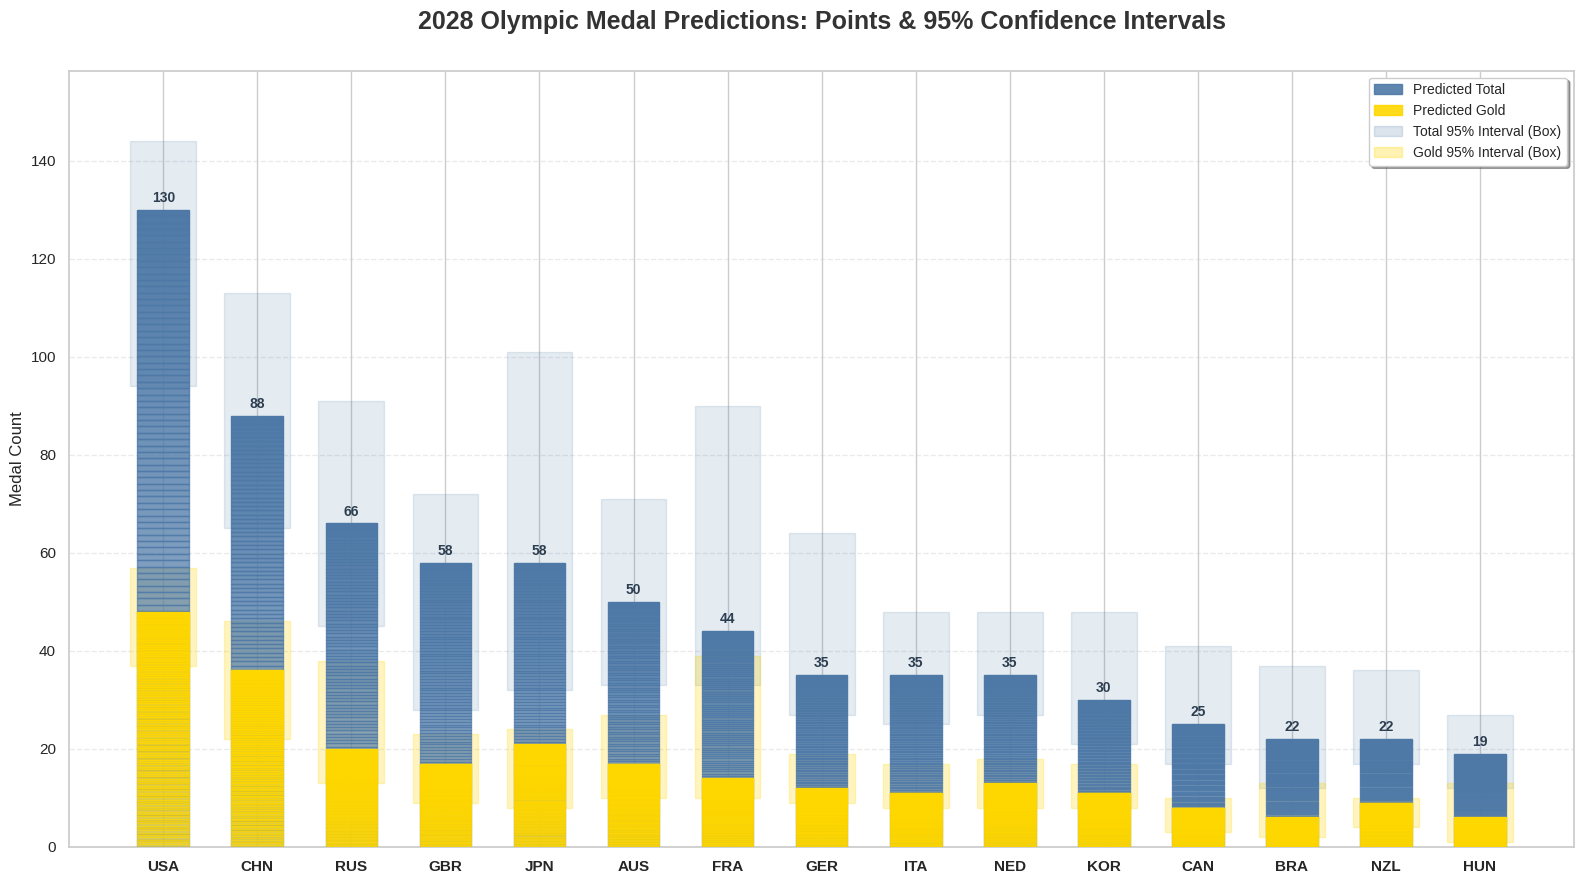

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from google.colab import drive

# 1. 挂载 Google Drive
drive.mount('/content/drive')

# 2. 读取数据
file_path = '/content/drive/MyDrive/medal_predictions_2028_with_host.csv'
df = pd.read_csv(file_path)

# 过滤并取前 15 名以保证区间框不拥挤
df_plot = df[df['Predicted_Total'] > 0].sort_values('Predicted_Total', ascending=False).head(15).reset_index()

# 3. 绘图核心设置
fig, ax = plt.subplots(figsize=(16, 9), dpi=100)
bar_width = 0.55  # 柱子宽度
box_width = 0.7   # 区间 Box 的宽度（比柱子略宽，产生层次感）

def draw_gradient_bar(ax, x, y, width, bottom=0, color_base='#4E79A7'):
    """绘制高质感渐变柱子"""
    grad_levels = 100
    for i in range(grad_levels):
        color = plt.cm.colors.to_rgba(color_base)
        alpha = 0.5 + 0.5 * (i / grad_levels)
        section_height = y / grad_levels
        rect = patches.Rectangle((x - width/2, bottom + i * section_height),
                                 width, section_height,
                                 color=color, alpha=alpha, zorder=3)
        ax.add_patch(rect)

# 4. 循环绘制每个国家的数据
for i, row in df_plot.iterrows():
    # --- A. 绘制总奖牌 95% 预测区间 Box (底层半透明) ---
    total_box = patches.Rectangle(
        (i - box_width/2, row['Predicted_Total_Lower95']),
        box_width, row['Predicted_Total_Upper95'] - row['Predicted_Total_Lower95'],
        color='#4E79A7', alpha=0.15, zorder=1, label='Total Interval' if i == 0 else ""
    )
    ax.add_patch(total_box)

    # --- B. 绘制金牌 95% 预测区间 Box (底层半透明) ---
    gold_box = patches.Rectangle(
        (i - box_width/2, row['Predicted_Gold_Lower95']),
        box_width, row['Predicted_Gold_Upper95'] - row['Predicted_Gold_Lower95'],
        color='#FFD700', alpha=0.25, zorder=2, label='Gold Interval' if i == 0 else ""
    )
    ax.add_patch(gold_box)

    # --- C. 绘制总奖牌预测点 (深蓝渐变柱子) ---
    draw_gradient_bar(ax, i, row['Predicted_Total'], bar_width, color_base='#4E79A7')

    # --- D. 绘制金牌预测点 (金色渐变柱子 - 叠在总奖牌底部) ---
    draw_gradient_bar(ax, i, row['Predicted_Gold'], bar_width, color_base='#FFD700')

    # --- E. 标注数值 ---
    # 顶部标注总奖牌预测值
    ax.text(i, row['Predicted_Total'] + 1, f"{int(row['Predicted_Total'])}",
            ha='center', va='bottom', fontsize=10, fontweight='bold', color='#2C3E50')

# 5. 图表修饰
ax.set_xlim(-1, len(df_plot))
ax.set_ylim(0, df_plot['Predicted_Total_Upper95'].max() * 1.1)
ax.set_xticks(range(len(df_plot)))
ax.set_xticklabels(df_plot['Mapped_NOC'], fontsize=11, fontweight='bold')

plt.title('2028 Olympic Medal Predictions: Points & 95% Confidence Intervals',
          fontsize=18, pad=30, fontweight='bold', color='#333333')
plt.ylabel('Medal Count', fontsize=12)

# 自定义图例
legend_elements = [
    patches.Patch(color='#4E79A7', alpha=0.9, label='Predicted Total'),
    patches.Patch(color='#FFD700', alpha=0.9, label='Predicted Gold'),
    patches.Patch(color='#4E79A7', alpha=0.2, label='Total 95% Interval (Box)'),
    patches.Patch(color='#FFD700', alpha=0.3, label='Gold 95% Interval (Box)')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, fontsize=10, shadow=True)

plt.grid(axis='y', linestyle='--', alpha=0.4, zorder=0)
plt.tight_layout()
plt.show()